In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datos = pd.read_csv('bike_buyers.csv')

In [3]:
datos.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


Nos damos cuenta que hay valores nulos
Así que ahora deberemos hacer la limpieza de los datos

In [4]:
datos.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


<AxesSubplot: >

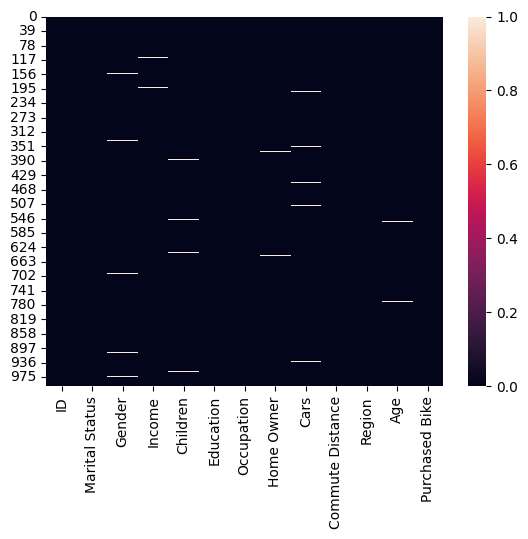

In [6]:
sns.heatmap(datos.isna())

In [7]:
print(datos.isna().sum().sum()/(1000*12), '%')

0.004416666666666667 %


Notamos que la cantidad de datos nulos es muy pequeña, así que decidimos cambiar esos valores de nuestro DataFrame

In [8]:
datos.fillna(value = datos[['Marital Status', 'Gender', 'Income', 'Children', 'Home Owner', 'Cars', 'Age']].mode().iloc[0], inplace= True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Income            1000 non-null   float64
 4   Children          1000 non-null   float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        1000 non-null   object 
 8   Cars              1000 non-null   float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               1000 non-null   float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


##### **R1.** Recodificar de acuerdo a su criterio la variable Income. ¿De qué rango de ingreso mejor proporción (ratio) compran más bicicletas?

In [9]:
datos['Income'].value_counts()

60000.0     171
40000.0     153
30000.0     134
70000.0     123
80000.0      90
20000.0      74
10000.0      73
50000.0      40
90000.0      38
130000.0     32
100000.0     29
120000.0     17
110000.0     16
150000.0      4
160000.0      3
170000.0      3
Name: Income, dtype: int64

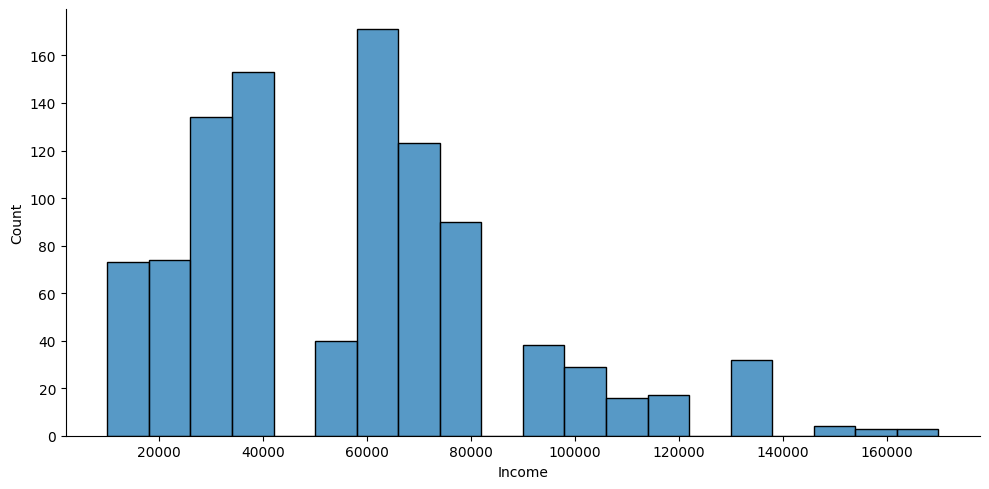

In [10]:
sns.displot(datos['Income'], aspect = 2)

In [11]:
datos['Income'][(datos['Income'] > 30000) & (datos['Income']< 70000)].count()

364

El rango de mayor ingreso de compras es [30000 - 70000]

##### **R2.** ¿Quiénes compran bicicletas a nivel de rango de ingresos y género?

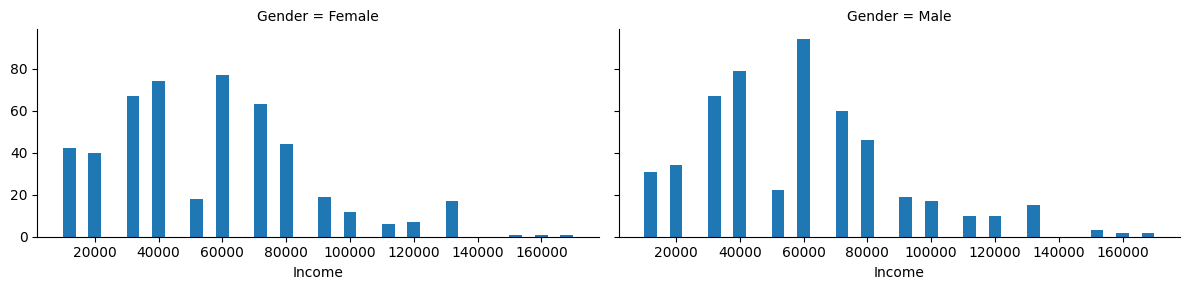

In [12]:
sns.FacetGrid(datos[['Income', 'Gender']], col = 'Gender', aspect = 2).map(plt.hist, 'Income', bins = 40)

In [13]:
comp = pd.DataFrame(datos[datos['Gender'] == 'Female']['Income'].value_counts())
comp2 = pd.DataFrame(datos[datos['Gender'] == 'Male']['Income'].value_counts())
comp['Hombres'] = comp2
comp.rename(columns={'Income': 'Mujeres'}, inplace=True)
comp.head()

,Mujeres,Hombres
60000.0,77,94
40000.0,74,79
30000.0,67,67
70000.0,63,60
80000.0,44,46


El rango de mayores compras en las mujeres es de 30000 a 70000

El rango de mayores compras en los hombres es de 30000 a 60000

pero en ambos casos podemos ver que los compradores con ingreso de 50000 no compran tantas bicicletas en comparación a los demás en este rango

##### **R3.** ¿Quiénes compran bicicletas a nivel de rango de ingresos y estado civil?

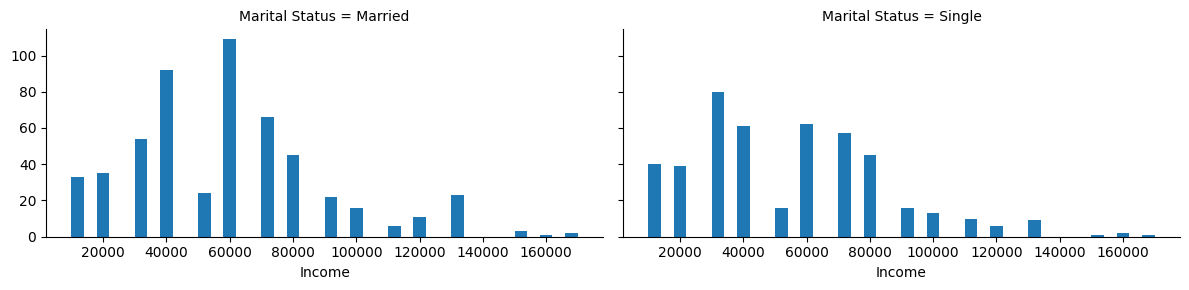

In [14]:
sns.FacetGrid(datos[['Income','Marital Status']], col = 'Marital Status', aspect = 2).map(plt.hist, 'Income', bins = 40)

In [15]:
comp = pd.DataFrame(datos[datos['Marital Status'] == 'Married']['Income'].value_counts())
comp2 = pd.DataFrame(datos[datos['Marital Status'] == 'Single']['Income'].value_counts())
comp['Single'] = comp2
comp.rename(columns={'Income': 'Married'}, inplace=True)
comp.head()

,Married,Single
60000.0,109,62
40000.0,92,61
70000.0,66,57
30000.0,54,80
80000.0,45,45


El rango de mayores compras en los solteros es de 30000 a 70000

El rango de mayores compras en los casados es de 40000 a 60000

pero en ambos casos podemos ver que los compradores con ingreso de 50000 no compran tantas bicicletas en comparación a los demás en este rango

##### **R4.** Calcular la correlación entre las variables numéricas de los clientes que compran bicicletas.

In [16]:
datos[['Income', 'Children', 'Cars', 'Age']].corr()

,Income,Children,Cars,Age
Income,1.000000,0.253091,0.433812,0.170501
Children,0.253091,1.000000,0.268914,0.524191
Cars,0.433812,0.268914,1.000000,0.184500
Age,0.170501,0.524191,0.184500,1.000000


<AxesSubplot: >

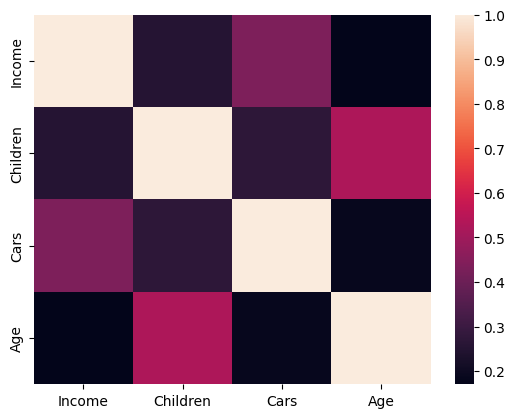

In [17]:
sns.heatmap(datos[['Income', 'Children', 'Cars', 'Age']].corr())

##### **R5.** ¿Qué regiones presentan el mayor número de compra “Yes” y “No”.

In [18]:
pd.DataFrame(datos[datos['Purchased Bike'] == 'Yes']['Region'].value_counts())
comp = pd.DataFrame(datos[datos['Purchased Bike'] == 'Yes']['Region'].value_counts())
comp2 = pd.DataFrame(datos[datos['Purchased Bike'] == 'No']['Region'].value_counts())
comp['No'] = comp2
comp.rename(columns={'Region': 'Yes'}, inplace=True)
comp

,Yes,No
North America,220,288
Europe,148,152
Pacific,113,79


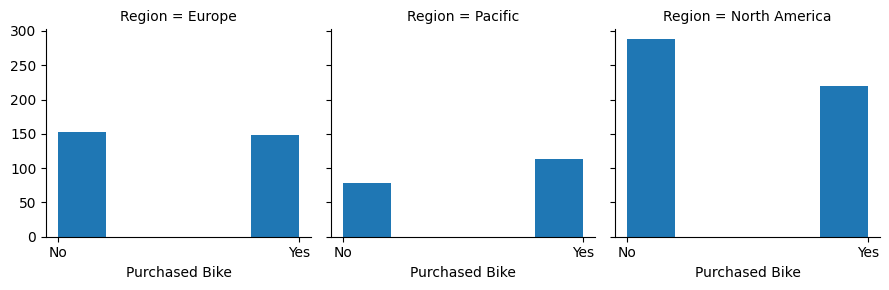

In [19]:
sns.FacetGrid(datos[['Purchased Bike','Region']], col = 'Region').map(plt.hist, 'Purchased Bike', bins = 5)

En la región que más compras hay es en North America

##### **R6.** Analizar las variables Gender, Occupation y Children.

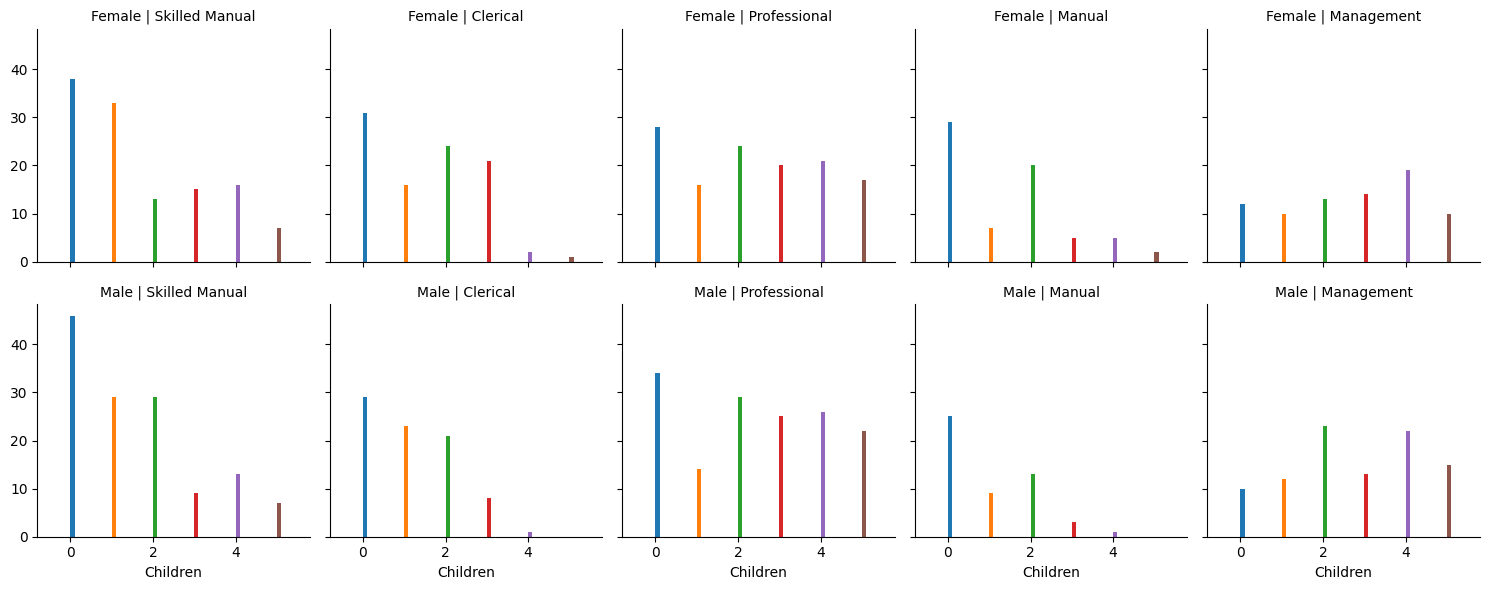

In [20]:
sns.FacetGrid(datos, row = 'Gender', col = 'Occupation', hue = 'Children').map(
    plt.hist, 'Children').set_titles(col_template='{col_name}', row_template = '{row_name}')

##### **R7**. Analizar las variables Education e Income.

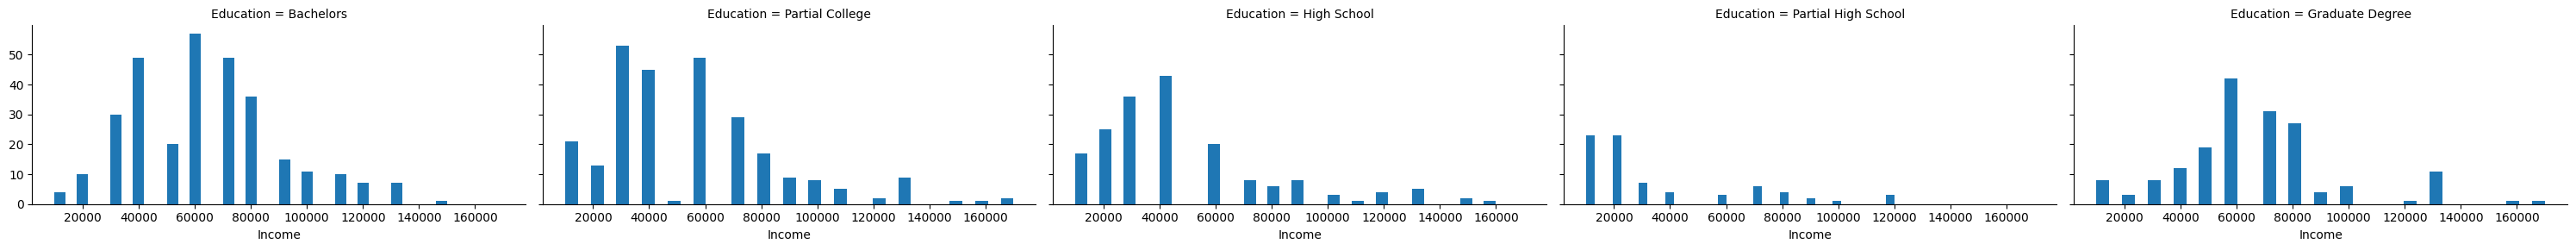

In [34]:
sns.FacetGrid(datos[['Income', 'Education']], col = 'Education', aspect = 2).map(plt.hist, 'Income', bins = 35)

##### **R8.** Analizar las variables Occupation y Cars.

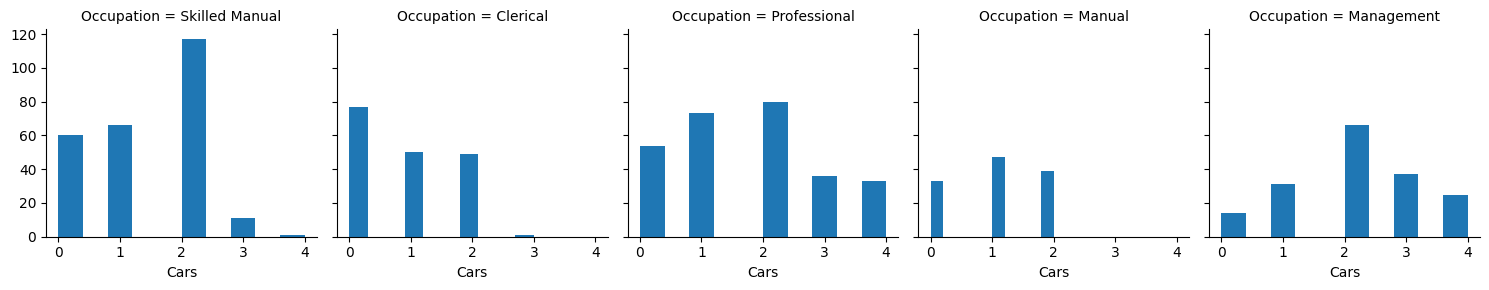

In [45]:
sns.FacetGrid(datos[['Occupation', 'Cars']], col = 'Occupation', aspect = 1).map(plt.hist, 'Cars')

##### **R9.** Analizar las variables HomeOwner, Cars y Children.

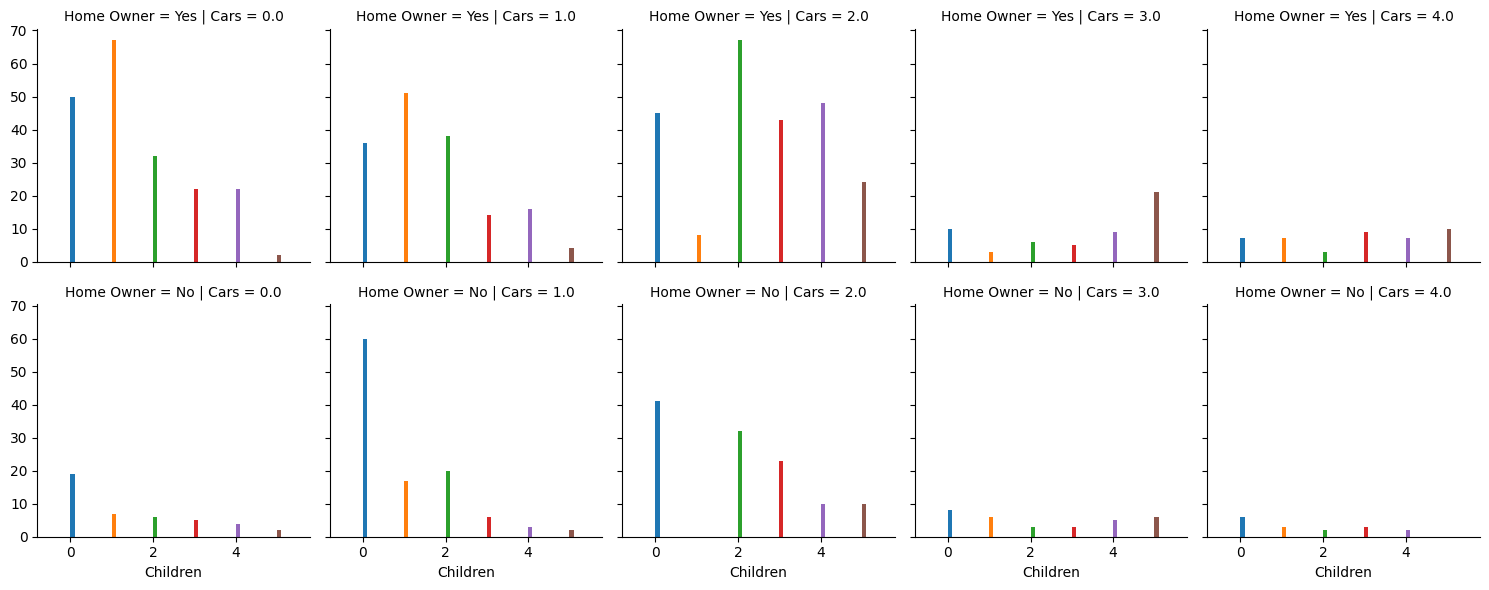

In [54]:
sns.FacetGrid(datos, row = 'Home Owner', col = 'Cars', hue = 'Children').map(plt.hist, 'Children')

##### **R10.** Analizar las variables CommuteDistance y Home Owner.

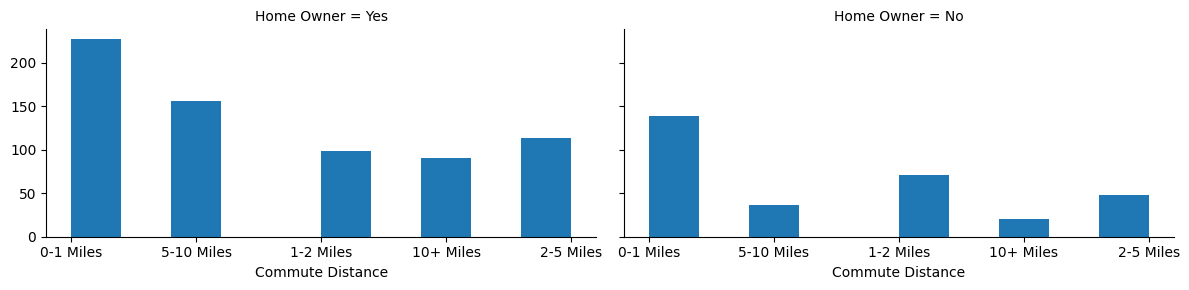

In [59]:
sns.FacetGrid(datos[['Home Owner', 'Commute Distance']], col = 'Home Owner', aspect = 2).map(plt.hist, 'Commute Distance')

##### **R11.** Analizar las variables Region y Commute Distance

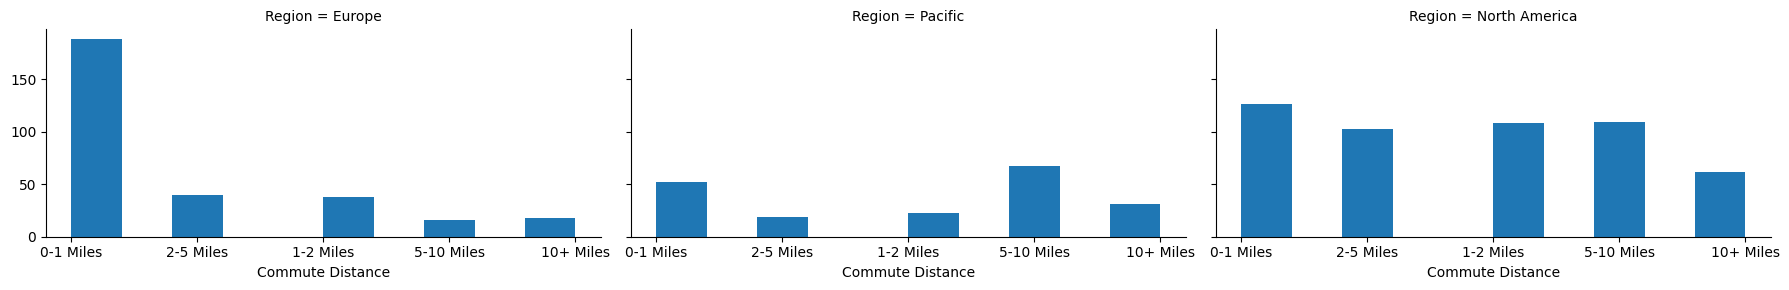

In [86]:
sns.FacetGrid(datos[['Region', 'Commute Distance']], col = 'Region', aspect = 2).map(plt.hist, 'Commute Distance')

##### **R12.** ¿Es factible predecir si un cliente compra o no compra la bicicleta?

In [61]:
df2 = datos.drop(['Marital Status', 'Education', 'Occupation','Region'], axis = 1)
df2

,ID,Gender,Income,Children,Home Owner,Cars,Commute Distance,Age,Purchased Bike
0,12496,Female,40000.0,1.0,Yes,0.0,0-1 Miles,42.0,No
1,24107,Male,30000.0,3.0,Yes,1.0,0-1 Miles,43.0,No
2,14177,Male,80000.0,5.0,No,2.0,2-5 Miles,60.0,No
3,24381,Male,70000.0,0.0,Yes,1.0,5-10 Miles,41.0,Yes
4,25597,Male,30000.0,0.0,No,0.0,0-1 Miles,36.0,Yes
...,...,...,...,...,...,...,...,...,...
995,23731,Male,60000.0,2.0,Yes,2.0,2-5 Miles,54.0,Yes
996,28672,Male,70000.0,4.0,Yes,0.0,2-5 Miles,35.0,Yes
997,11809,Male,60000.0,2.0,Yes,0.0,0-1 Miles,38.0,Yes
998,19664,Male,100000.0,3.0,No,3.0,1-2 Miles,38.0,No


In [62]:
df_index = df2[['ID', 'Purchased Bike']]
df2 = df2.drop(['ID'], axis=1)

In [63]:
X = df2.drop(['Purchased Bike'], axis=1)

In [64]:
y = df2['Purchased Bike']

In [65]:
categoricas = X.select_dtypes(include=('object','category')).columns.tolist()
numericas = X.select_dtypes(include=('int64','float64')).columns.tolist()

In [66]:
variables_str  = X.select_dtypes(include = ['object','category']).columns.tolist()
for var in variables_str:
    print('N de ', var,':',df2[var].nunique())

N de  Gender : 2
N de  Home Owner : 2
N de  Commute Distance : 5


In [67]:
categorical=pd.get_dummies(X[categoricas],columns=categoricas,drop_first=True)
categorical.columns = ['Gender', 'Home Owner', 'Commute Distance_1', 'Commute Distance_2', 'Commute Distance_3', 'Commute Distance_4']
categorical.head()

,Gender,Home Owner,Commute Distance_1,Commute Distance_2,Commute Distance_3,Commute Distance_4
0,0,1,0,0,0,0
1,1,1,0,0,0,0
2,1,0,0,0,1,0
3,1,1,0,0,0,1
4,1,0,0,0,0,0


In [68]:
numericas

['Income', 'Children', 'Cars', 'Age']

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical = X[numericas]
numerical = pd.DataFrame(scaler.fit_transform(numerical),
                         columns=['Income','Children','Cars','Age'],index= numerical.index)

In [70]:
preprocessed_data = pd.merge(numerical, categorical, left_index=True, right_index=True)
preprocessed_data.head()

,Income,Children,Cars,Age,Gender,Home Owner,Commute Distance_1,Commute Distance_2,Commute Distance_3,Commute Distance_4
0,-0.526159,-0.549589,-1.3067,-0.189805,0,1,0,0,0,0
1,-0.849154,0.678543,-0.4117,-0.101441,1,1,0,0,0,0
2,0.765821,1.906676,0.4833,1.400738,1,0,0,0,1,0
3,0.442826,-1.163656,-0.4117,-0.278168,1,1,0,0,0,1
4,-0.849154,-1.163656,-1.3067,-0.719986,1,0,0,0,0,0


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_data,y,train_size = 0.7,random_state = 20,stratify = y)

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=5000) #Parametros utilizados para problemas con multiclases

In [75]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [76]:
y_pred_train=logmodel.predict(X_train) # Prediccion sobre el train
y_pred_test=logmodel.predict(X_test) # Prediccion sobre el test

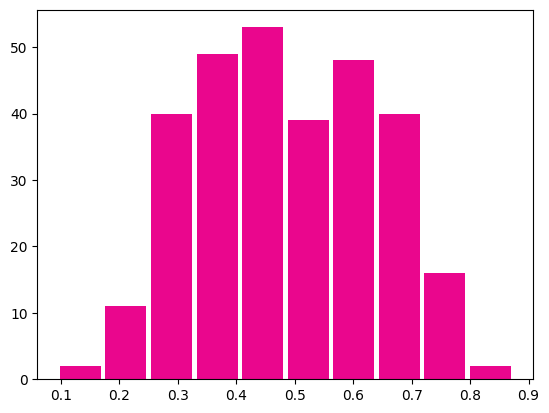

In [77]:
prob_test_rl = logmodel.predict_proba(X_test)[:,1]
plt.hist(prob_test_rl, color = '#ea068d', rwidth=0.9)
plt.savefig('Probabilidades_logreg.png', bbox_inches='tight')

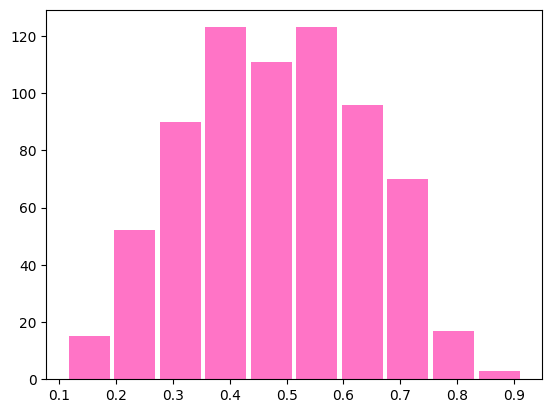

In [78]:
prob_train_rl = logmodel.predict_proba(X_train)[:,1]
plt.hist(prob_train_rl, color = '#ff74c6', rwidth=0.9)
plt.savefig('Probabilidades_train_logreg.png', bbox_inches='tight')

In [80]:
from sklearn.metrics import classification_report

In [81]:
predictions = logmodel.predict(X_test)

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.64      0.66      0.65       156
         Yes       0.62      0.60      0.61       144

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300



In [83]:
datos.to_csv('data_limpia.csv', index=False)